<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.1.-Откройте-файлы-и-изучите-их." data-toc-modified-id="1.1.-Откройте-файлы-и-изучите-их.-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>1.1. Откройте файлы и изучите их.</a></span></li><li><span><a href="#1.2.-Проверьте,-что-эффективность-обогащения-рассчитана-правильно.-Вычислите-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдите-MAE-между-вашими-расчётами-и-значением-признака.-Опишите-выводы." data-toc-modified-id="1.2.-Проверьте,-что-эффективность-обогащения-рассчитана-правильно.-Вычислите-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдите-MAE-между-вашими-расчётами-и-значением-признака.-Опишите-выводы.-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.</a></span></li><li><span><a href="#1.3.-Проанализируйте-признаки,-недоступные-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?" data-toc-modified-id="1.3.-Проанализируйте-признаки,-недоступные-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?</a></span></li><li><span><a href="#1.4.-Проведите-предобработку-данных." data-toc-modified-id="1.4.-Проведите-предобработку-данных.-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>1.4. Проведите предобработку данных.</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#3.1.-Напишите-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="3.1.-Напишите-функцию-для-вычисления-итоговой-sMAPE.-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>3.1. Напишите функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Проверим-на-тестовых-данных-полученные-модели" data-toc-modified-id="Проверим-на-тестовых-данных-полученные-модели-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Проверим на тестовых данных полученные модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## Подготовка данных

In [1]:
# Загрузим необходимые библиотеки для проекта
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from scipy import stats as st
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from numpy.random import RandomState
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
random_state = np.random.RandomState(12345)
from sklearn.dummy import DummyRegressor

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично! Спасибо, что перезапускаешь проект перед отправкой на ревью - это важный шаг, который поможет избежать простых и досадных ошибок при воспроизведении решнеия:)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [2]:
# функция определения выбросов по правилу 3 сигм
def outlier(data):
    data_mean, data_std = np.mean(data), np.std(data)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    return len(outliers)

#  функция для описания статистик: 
def describe_full_stat(df, target_name=""):
    data_describe = df.describe().T
    df_numeric = df._get_numeric_data()
    if target_name in df.columns:
        corr_with_target=df_numeric.drop(target_name, axis=1).apply(lambda x: x.corr(df_numeric[target_name]))
        data_describe['corr_with_target']=corr_with_target
    dtype_df = df_numeric.dtypes
    data_describe['dtypes'] = dtype_df
    data_null = df_numeric.isnull().sum()/len(df) * 100
    data_describe['Missing %'] = data_null
    Cardinality = df_numeric.apply(pd.Series.nunique)
    data_describe['Cardinality'] = Cardinality
    df_skew = df_numeric.skew(axis=0, skipna=True)
    data_describe['Skew'] = df_skew
    data_describe['outliers']=[outlier(df_numeric[col]) for col in df_numeric.columns]
    data_describe['kurtosis']=df_numeric.kurtosis()
    return data_describe


#  функция для отображения графика плотностей в датафрейме по группам: 
def dspl_group_density_plt(df, groupby, on, palette = None, figsize = None, title="", ax=None):
    """
Отображает график плотности по группам, учитывая непрерывную переменную, и группу для разделения данных.
     :param df: DataFrame для отображения данных
     :param groupby: Имя столбца, по которому будут сгруппированы графики (категориальный, максимум 10 категорий)
     :param on: Имя столбца для различных графиков плотности
     :param палитра: Цветовая палитра для рисования.
     :param figsize: Размер фигуры
     : return: объект matplotlib.axes._subplots.AxesSubplot
    """

    if not isinstance(df, pd.core.frame.DataFrame):
        raise ValueError('df must be a pandas DataFrame')

    if not groupby:
        raise ValueError('groupby parameter must be provided')

    elif not groupby in df.keys():
        raise ValueError(groupby + ' column does not exist in the given DataFrame')

    if not on:
        raise ValueError('on parameter must be provided')

    elif not on in df.keys():
        raise ValueError(on + ' column does not exist in the given DataFrame')

    if len(set(df[groupby])) > 10:
        groups = df[groupby].value_counts().index[:10]

    else:
        groups = set(df[groupby])

    # Get relevant palette
    if palette:
        palette = palette[:len(groups)]
    else:
        palette = sns.color_palette()[:len(groups)]

    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
    
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
    for value, color in zip(groups, palette):
        sns.kdeplot(df.loc[df[groupby] == value][on], \
                    shade=True, color=color, label=value, ax=ax)
    if not title:
        title = str("Distribution of " + on + " per " + groupby + " group")
    
    ax.set_title(title,fontsize=16)
    ax.set_xlabel(on, fontsize=16)
    return ax 


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Сделали набор функций для работы - отлично!

#### 1.1. Откройте файлы и изучите их.


In [3]:
gold_train = pd.read_csv("/datasets/gold_recovery_train_new.csv")
gold_test = pd.read_csv("/datasets/gold_recovery_test_new.csv")
gold_full = pd.read_csv("/datasets/gold_recovery_full_new.csv")

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные загрузили.
    
При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')

Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.

In [4]:
gold_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [5]:
describe_full_stat(gold_full)

,count,mean,std,min,25%,50%,75%,max,dtypes,Missing %,Cardinality,Skew,outliers,kurtosis
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.000000e+00,4.251240,5.066094,5.895527,1.600195e+01,float64,0.005144,19307,0.647410,317,3.196185
final.output.concentrate_pb,19438.0,9.978895,1.669240,0.000000e+00,9.137262,10.102433,11.035769,1.703190e+01,float64,0.005144,19276,-1.547348,240,7.076946
final.output.concentrate_sol,19228.0,9.501224,2.787537,0.000000e+00,7.722820,9.218961,10.947813,1.961572e+01,float64,1.085447,19093,0.221821,160,0.907135
final.output.concentrate_au,19439.0,44.076513,5.129784,0.000000e+00,43.402215,45.011244,46.275313,5.275664e+01,float64,0.000000,19308,-5.163349,349,35.834801
final.output.recovery,19439.0,67.050208,10.125840,0.000000e+00,63.299712,68.172738,72.686642,1.000000e+02,float64,0.000000,19235,-2.120035,368,11.981007
final.output.tail_ag,19438.0,9.688589,2.328642,0.000000e+00,8.062878,9.743623,11.134294,1.955215e+01,float64,0.005144,19328,-0.195322,264,1.648768
final.output.tail_pb,19338.0,2.705795,0.949077,0.000000e+00,2.040119,2.748730,3.333216,5.804178e+00,float64,0.519574,19228,-0.043725,20,-0.066762
final.output.tail_sol,19433.0,10.583728,2.868782,0.000000e+00,8.938947,10.622456,12.104271,2.231773e+01,float64,0.030866,19322,0.009398,259,1.759058
final.output.tail_au,19439.0,3.042467,0.922808,0.000000e+00,2.461138,2.984909,3.571351,8.245022e+00,float64,0.000000,19329,0.399755,308,1.749992
primary_cleaner.input.sulfate,19415.0,144.624774,44.464071,3.111820e-03,114.107029,143.232103,175.075656,2.659831e+02,float64,0.123463,19415,0.004358,19,-0.280587


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Беглый осмотр данных на месте - порядок!

#### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.


Сокращение MAE означает "Mean Absolute Error" или "Средняя абсолютная ошибка". Это метрика, используемая для измерения точности прогнозирования или оценки моделей машинного обучения, особенно в задачах регрессии.

Средняя абсолютная ошибка вычисляется путем усреднения абсолютных разностей между фактическими и прогнозируемыми значениями. Эта метрика предоставляет общее представление о том, насколько модель точна в своих прогнозах.

Формула для вычисления средней абсолютной ошибки:

MAE = (1/n) * Σ |y_i - ŷ_i|

где:

n — количество примеров в наборе данных
y_i — фактическое значение для i-го примера
ŷ_i — прогнозируемое значение для i-го примера
Чем ниже значение средней абсолютной ошибки, тем точнее модель. Однако важно учесть, что эта метрика чувствительна к выбросам и может быть непропорционально высокой, если присутствуют экстремальные значения в данных.

In [6]:
# рассчитаем по формуле из документации расчет эффективности обогащения 
rougher_recovery_calc = \
100 * (gold_train['rougher.output.concentrate_au'] * (gold_train['rougher.input.feed_au'] - gold_train['rougher.output.tail_au']))\
/ (gold_train['rougher.input.feed_au'] * (gold_train['rougher.output.concentrate_au'] - gold_train['rougher.output.tail_au']))

# сделаем таблицу где будет рассчетный коэффициент и данные тренировочные
df_output_rougher = pd.DataFrame({"output_recovery":gold_train["rougher.output.recovery"],"calc":rougher_recovery_calc}).dropna()
# проверим среднюю абсолютную ошибку
MAE = mean_absolute_error(df_output_rougher["output_recovery"],df_output_rougher["calc"])
print(f"MAE={MAE}")


MAE=1.1131451184435918e-14


Абсолютная ошибка не большая - данные посчитаны корректно

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Оценили `MAE` между исходным и расчётным значением эффективности обогащения и убедились, что эффективность обогащения рассчитана правильно - отлично!
</div>

#### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?


Функция np.vectorize из библиотеки NumPy предоставляет возможность преобразовать обычные функции, которые работают с скалярными значениями, в функции, которые могут работать с массивами (векторизованные функции). Это обеспечивает более быстрое и эффективное выполнение операций с массивами, особенно с большими данными.

np.vectorize принимает функцию в качестве аргумента и возвращает векторизованную версию этой функции. Векторизованная функция может быть применена к массивам NumPy и выполняться поэлементно.

In [7]:
#список всех колонок и типов в таблице
gold_all_types = gold_full.dtypes.reset_index()

# переименуем таблицу имен колонок и типов
gold_all_types.columns = ["name", "type"]

# объединим в серию все колонки всех файлов
all_cols = pd.Series(list(set(gold_full.columns).union(set(gold_train.columns).union(set(gold_test.columns)))))

# сведем все колонки из всех файлов в общую таблицу 
gold_temp = pd.DataFrame({"name": all_cols}).merge(gold_all_types).sort_values(by="name")

# пропишем 0 или 1 если колонка (признак) есть в файле gold_full. т.е. если 0 в строке, то колонки с таким именем нет в соответствующем файле
gold_temp["full"] = np.vectorize(lambda x: int(x in gold_full.columns))(gold_temp["name"].values)
gold_temp["train"] = np.vectorize(lambda x: int(x in gold_train.columns))(gold_temp["name"].values)
gold_temp["test"] = np.vectorize(lambda x: int(x in gold_test.columns))(gold_temp["name"].values)
# признаки, недоступные в тестовой выборке:
gold_temp[gold_temp["test"]==0].reset_index(drop=True)
# 34 столбца отличаются - этих столбцов нет в тестовой выборке


,name,type,full,train,test
0,final.output.concentrate_ag,float64,1,1,0
1,final.output.concentrate_au,float64,1,1,0
2,final.output.concentrate_pb,float64,1,1,0
3,final.output.concentrate_sol,float64,1,1,0
4,final.output.recovery,float64,1,1,0
5,final.output.tail_ag,float64,1,1,0
6,final.output.tail_au,float64,1,1,0
7,final.output.tail_pb,float64,1,1,0
8,final.output.tail_sol,float64,1,1,0
9,primary_cleaner.output.concentrate_ag,float64,1,1,0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Проанализировали разницу в признаках между выборками.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

#### 1.4. Проведите предобработку данных.


In [8]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [9]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [10]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [11]:
describe_full_stat(gold_full)

,count,mean,std,min,25%,50%,75%,max,dtypes,Missing %,Cardinality,Skew,outliers,kurtosis
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.000000e+00,4.251240,5.066094,5.895527,1.600195e+01,float64,0.005144,19307,0.647410,317,3.196185
final.output.concentrate_pb,19438.0,9.978895,1.669240,0.000000e+00,9.137262,10.102433,11.035769,1.703190e+01,float64,0.005144,19276,-1.547348,240,7.076946
final.output.concentrate_sol,19228.0,9.501224,2.787537,0.000000e+00,7.722820,9.218961,10.947813,1.961572e+01,float64,1.085447,19093,0.221821,160,0.907135
final.output.concentrate_au,19439.0,44.076513,5.129784,0.000000e+00,43.402215,45.011244,46.275313,5.275664e+01,float64,0.000000,19308,-5.163349,349,35.834801
final.output.recovery,19439.0,67.050208,10.125840,0.000000e+00,63.299712,68.172738,72.686642,1.000000e+02,float64,0.000000,19235,-2.120035,368,11.981007
final.output.tail_ag,19438.0,9.688589,2.328642,0.000000e+00,8.062878,9.743623,11.134294,1.955215e+01,float64,0.005144,19328,-0.195322,264,1.648768
final.output.tail_pb,19338.0,2.705795,0.949077,0.000000e+00,2.040119,2.748730,3.333216,5.804178e+00,float64,0.519574,19228,-0.043725,20,-0.066762
final.output.tail_sol,19433.0,10.583728,2.868782,0.000000e+00,8.938947,10.622456,12.104271,2.231773e+01,float64,0.030866,19322,0.009398,259,1.759058
final.output.tail_au,19439.0,3.042467,0.922808,0.000000e+00,2.461138,2.984909,3.571351,8.245022e+00,float64,0.000000,19329,0.399755,308,1.749992
primary_cleaner.input.sulfate,19415.0,144.624774,44.464071,3.111820e-03,114.107029,143.232103,175.075656,2.659831e+02,float64,0.123463,19415,0.004358,19,-0.280587


In [12]:
describe_full_stat(gold_test)

,count,mean,std,min,25%,50%,75%,max,dtypes,Missing %,Cardinality,Skew,outliers,kurtosis
primary_cleaner.input.sulfate,5286.0,174.839652,43.027080,2.566156e+00,147.121401,177.828489,208.125438,265.983123,float64,0.075614,5286,-0.511682,25,0.135960
primary_cleaner.input.depressant,5285.0,8.683596,3.072050,3.839482e-03,6.489555,8.052207,10.027764,40.000000,float64,0.094518,5285,0.896578,23,2.270430
primary_cleaner.input.feed_size,5290.0,7.266339,0.610219,5.650000e+00,6.890000,7.250000,7.600000,15.500000,float64,0.000000,1537,0.804772,40,7.292026
primary_cleaner.input.xanthate,5286.0,1.383803,0.643474,4.983673e-03,0.907623,1.197610,1.797819,4.102454,float64,0.075614,5286,1.154068,68,1.568311
primary_cleaner.state.floatbank8_a_air,5290.0,1539.494325,116.797884,5.445860e-32,1498.935802,1585.129123,1602.076529,2103.103580,float64,0.000000,5290,-1.680756,13,13.090968
primary_cleaner.state.floatbank8_a_level,5290.0,-497.665883,19.952431,-7.953163e+02,-500.357298,-499.969164,-499.568951,-57.195404,float64,0.000000,5290,3.362935,139,104.509902
primary_cleaner.state.floatbank8_b_air,5290.0,1545.174232,122.224588,6.647490e-32,1498.970993,1595.621798,1602.323545,1813.083671,float64,0.000000,5290,-1.503226,6,10.653988
primary_cleaner.state.floatbank8_b_level,5290.0,-500.273098,32.968307,-7.999970e+02,-500.703002,-500.028514,-499.293257,-142.527229,float64,0.000000,5290,-3.825603,141,45.824567
primary_cleaner.state.floatbank8_c_air,5290.0,1527.272362,122.538034,4.033736e-32,1473.229862,1549.594682,1601.143775,1715.053773,float64,0.000000,5290,-1.572348,13,12.095391
primary_cleaner.state.floatbank8_c_level,5290.0,-498.330680,21.964876,-7.999606e+02,-501.018117,-500.017711,-498.994130,-150.937035,float64,0.000000,5290,0.467655,166,60.377646


In [13]:
describe_full_stat(gold_train)

,count,mean,std,min,25%,50%,75%,max,dtypes,Missing %,Cardinality,Skew,outliers,kurtosis
final.output.concentrate_ag,14148.0,5.142034,1.369586,0.000000e+00,4.211620,4.994652,5.859540,1.600195e+01,float64,0.007068,14064,0.857673,235,3.621840
final.output.concentrate_pb,14148.0,10.132960,1.654930,0.000000e+00,9.297355,10.297144,11.170603,1.703190e+01,float64,0.007068,14050,-1.514480,157,6.796471
final.output.concentrate_sol,13938.0,9.202849,2.790516,0.000000e+00,7.484645,8.845462,10.487508,1.812485e+01,float64,1.491271,13853,0.362407,98,0.966991
final.output.concentrate_au,14149.0,44.003792,4.905261,0.000000e+00,43.276111,44.872436,46.166425,5.275664e+01,float64,0.000000,14065,-5.181279,235,37.209857
final.output.recovery,14149.0,66.518832,10.295402,0.000000e+00,62.545817,67.432775,72.346428,1.000000e+02,float64,0.000000,14008,-1.795941,279,9.779187
final.output.tail_ag,14149.0,9.607035,2.319069,0.000000e+00,7.997429,9.480270,11.003707,1.955215e+01,float64,0.000000,14062,-0.030126,231,2.034923
final.output.tail_pb,14049.0,2.597298,0.971843,0.000000e+00,1.905973,2.592022,3.241723,5.639565e+00,float64,0.706764,13962,0.099558,9,-0.225181
final.output.tail_sol,14144.0,10.512122,3.003617,0.000000e+00,8.811324,10.514621,11.933009,2.231773e+01,float64,0.035338,14057,0.194825,178,1.727617
final.output.tail_au,14149.0,2.918421,0.903712,0.000000e+00,2.368607,2.851025,3.434764,8.197408e+00,float64,0.000000,14062,0.474077,257,2.096451
primary_cleaner.input.sulfate,14129.0,133.320659,39.431659,3.111820e-03,107.006651,133.018328,159.825396,2.501278e+02,float64,0.141353,14129,-0.051465,17,-0.115617


In [14]:
# заменим тип данных в столбцах date с object на datetime
for df in [gold_full, gold_train, gold_test]:
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"])
        df.set_index("date", inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Сделали дату индексом - отлично!

In [15]:
# в целевых метриках пропусков нет
print(gold_train['final.output.recovery'].isna().sum())
print(gold_train['rougher.output.recovery'].isna().sum())

0
0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Окей, это важно!

In [16]:
gold_test = gold_test.merge(gold_full[['final.output.recovery', 'rougher.output.recovery']], how='left', left_index=True, right_index=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В `test` добавили целевые признаки из `full`, используя дату как ключ при соединении - отлично!
    
Так как мы установили дату в качестве индекса, то можно было бы использовать `join()` вместо `merge()` и не настраивать `left/right_index()`, а ещё проще - сделать простое присваивание вида `gold_test['final.output.recovery'] = gold_full['final.output.recovery']`, так как и оно работает по индексам:)

In [17]:
gold_train = gold_train.fillna(method='ffill')

gold_test = gold_test.fillna(method='ffill')

 судя по всему, данные идут по дате и времени "один за одним", поэтому заменим пропуски ближайшими соседними значениями
 как в анекдоте о предсказании погоды - лучший способ предсказать погоду на завтра, это знать погоду сегодня)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Обработали пропуски с помощью стратегии заполнения `forward fill`, а также пояснили причину выбора такой стратегии - отлично!
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [18]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                     

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации⚠️:</b> 

Здесь заканчивается стрктурный блок работы - стоит делать промежуточные выводы о проделанной работе, это довольно полезная практика, которая имеет большую ценность для получателя отчёта.
        
Достаточно будет двух-трёх тезисных предложений об основных шагах и полученных выводах.
        
</div>

## Анализ данных

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


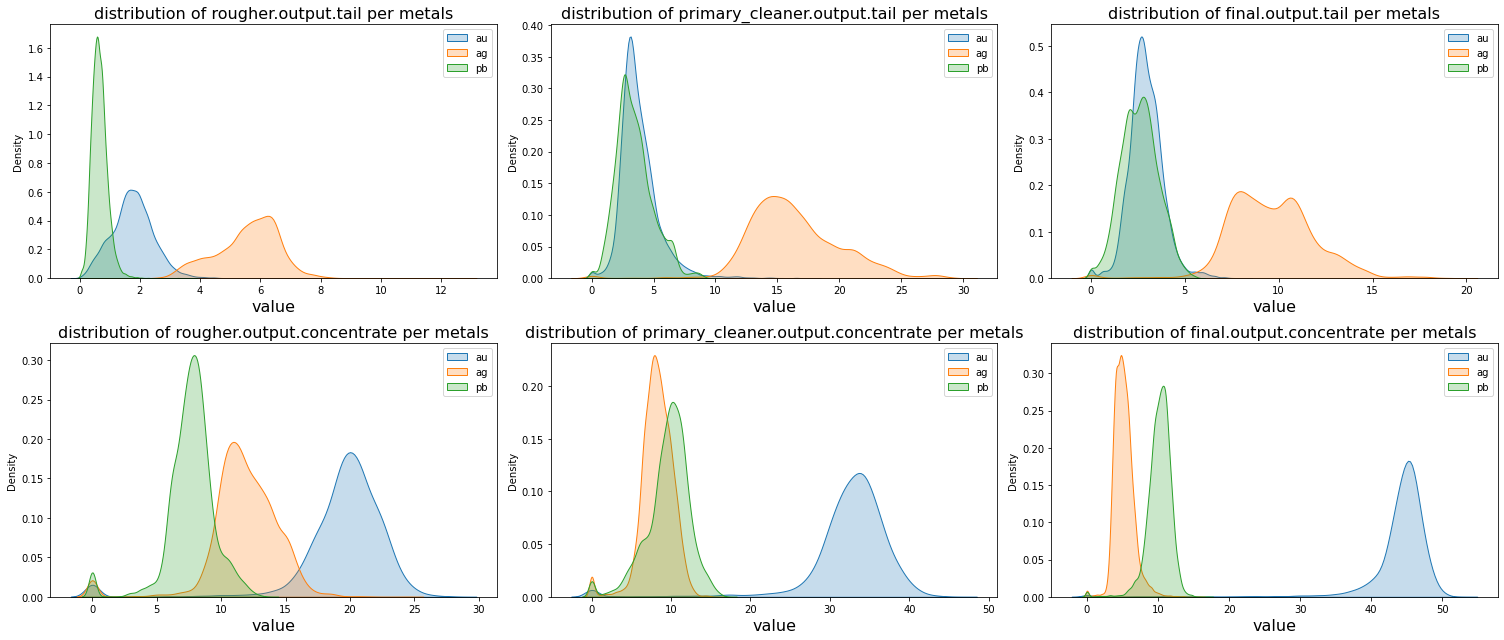

In [19]:
metals = ['au', 'ag', 'pb']
columns = ['rougher.output.tail', 'primary_cleaner.output.tail','final.output.tail',\
           'rougher.output.concentrate', 'primary_cleaner.output.concentrate','final.output.concentrate']

_, axs = plt.subplots(2,3, figsize=(21, 9))
axs = axs.flatten()

for column, ax in zip(columns, axs):
    cols = [f"{t}_{m}" for t,m in zip([column]*3,metals)]
    temp_df = pd.melt(gold_train[cols])
    temp_df["variable"] = temp_df["variable"].str.replace(column+"_","")
    dspl_group_density_plt(temp_df, groupby="variable", on="value", title=f"distribution of {column} per metals", ax=ax)
    ax.legend()

plt.tight_layout()
plt.show()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Стоит понять причину возникновения предупреждений и устранить их. Обычно в них содержатся довольно полезные советы или важная информация о работоспособности или стабильности решения в будущих версиях библиотек, поэтому их не стоит игнорировать.
        
Зачастую в тексте предупреждения уже содержится информация, что нужно поменять - стоит обратить внимание на текст предупреждения.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Исследована концентрация металлов на разных стадиях обработки, проанализирована динамика концентрации в зависимости от этапа техпроцесса - отлично, тут всё верно.
    
Круто, что отмечены нулевые значения на графике концентрации - это действительно аномалия, подлежащая удалению.
</div>

Распределение металов, которые идут в "хвосты" и в "концентрат" после 3 ех технологических этапов
1. Флотация (rougher) - 20 золота, 12 серебра, 7 свинца идут в концентрат; 2 золота, 6 серебра, 1 свинца идут в хвосты
2. Первичная очистка (primary_cleaner) - концентрация золота в концентрате растет: 35 золота, 10 серебра, 7 свинца; Заметно на этапе первичной очистки увеличилась концентрация серебра в хвостах;
3. Финал - концентрация золота уже 45 в концентрате

На всех этапах, есть значение 0 в output концентрате (такие пики у нуля на нижнем ряду графиков)
Возможно их нужно удалить - надо посоветоваться с заказчиком, откуда могли взяться нули

переместил 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

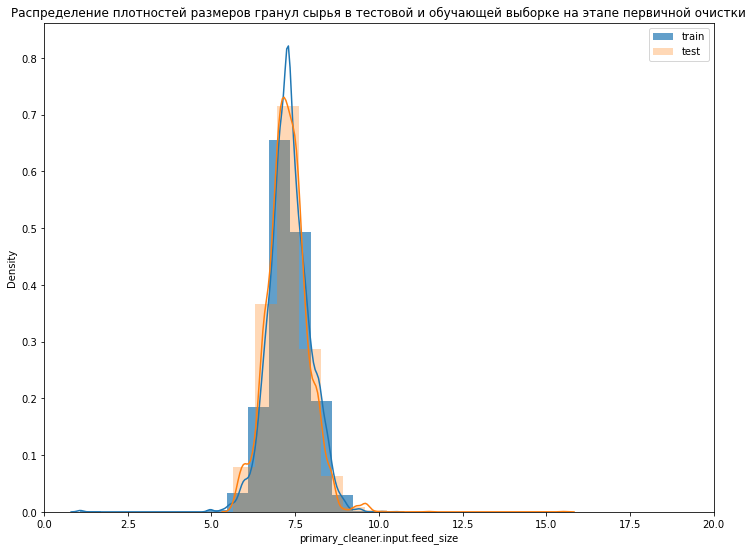

In [20]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.distplot(gold_train["primary_cleaner.input.feed_size"],bins=15, hist_kws=dict(alpha=0.7), label="train")
g = sns.distplot(gold_test["primary_cleaner.input.feed_size"],bins=15, hist_kws=dict(alpha=0.3), label="test")
g.set(xlim=(0, 20))
g.legend()
plt.title('Распределение плотностей размеров гранул сырья в тестовой и обучающей выборке на этапе первичной очистки')
plt.show()

In [21]:
gold_train.describe()['primary_cleaner.input.feed_size']

count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

In [22]:
gold_test.describe()['primary_cleaner.input.feed_size']


count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

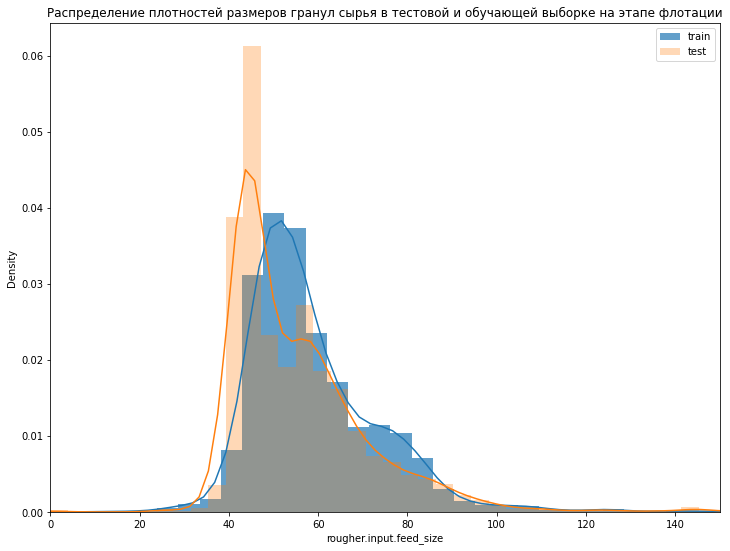

In [23]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.distplot(gold_train["rougher.input.feed_size"],bins=100, hist_kws=dict(alpha=0.7), label="train")
g = sns.distplot(gold_test["rougher.input.feed_size"],bins=100, hist_kws=dict(alpha=0.3), label="test")
g.set(xlim=(0, 150))
plt.title('Распределение плотностей размеров гранул сырья в тестовой и обучающей выборке на этапе флотации')
g.legend()
plt.show()


In [24]:
gold_train.describe()['rougher.input.feed_size']

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [25]:
gold_test.describe()['rougher.input.feed_size']


count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

Средние размеры гранул сырья на обучающей и тестовой выборках похожи - 60 на обучающей и 55 на тестовой; отклонение 23 и 19

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Сравнили размеры гранул сырья на обучающей и тестовой выборках для этапов `rougher.input.feed_size` и `primary_cleaner.input.feed_size` - отлично, распределения между выборками действительно схожи, следовательно модель будет корректно работать.
    
Здорово, что используешь гистограмму плотности для оценки распределения непрерывных переменных.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [26]:
df_columns = (
    gold_full.columns
    .rename("full_parameter_name")
    .to_frame()
    .reset_index(drop=True)
)

df_columns

,full_parameter_name
0,final.output.concentrate_ag
1,final.output.concentrate_pb
2,final.output.concentrate_sol
3,final.output.concentrate_au
4,final.output.recovery
5,final.output.tail_ag
6,final.output.tail_pb
7,final.output.tail_sol
8,final.output.tail_au
9,primary_cleaner.input.sulfate


In [27]:
# Убираем дату из первой строки
df_columns = df_columns.loc[1:]

# Разбиваем full_parameter_name
# на три новых столбца
df_columns = pd.concat(
    [
     df_columns,
     df_columns["full_parameter_name"]
     .str.split(".", expand=True)
     .rename(columns={0: "stage", 1: "parameter_type", 2: "parameter_name"}),
    ],
    axis=1,
)

df_columns

,full_parameter_name,stage,parameter_type,parameter_name
1,final.output.concentrate_pb,final,output,concentrate_pb
2,final.output.concentrate_sol,final,output,concentrate_sol
3,final.output.concentrate_au,final,output,concentrate_au
4,final.output.recovery,final,output,recovery
5,final.output.tail_ag,final,output,tail_ag
6,final.output.tail_pb,final,output,tail_pb
7,final.output.tail_sol,final,output,tail_sol
8,final.output.tail_au,final,output,tail_au
9,primary_cleaner.input.sulfate,primary_cleaner,input,sulfate
10,primary_cleaner.input.depressant,primary_cleaner,input,depressant


In [28]:
# Переименуем этапы с индексом порядка
df_columns.loc[
    df_columns["stage"] == "final", ["stage"]
] = "4_final"

df_columns.loc[
    df_columns["stage"] == "secondary_cleaner", ["stage"]
] = "3_secondary_cleaner"

df_columns.loc[
    df_columns["stage"] == "primary_cleaner", ["stage"]
] = "2_primary_cleaner"

df_columns.loc[
    df_columns["stage"] == "rougher", ["stage"]
] = "1_rougher"

# Для прозрачности добавим столбец этап + тип параметра
df_columns.loc[:, "stage_type"] = (df_columns["stage"]
                                   + "_"
                                   + df_columns["parameter_type"])
df_columns.stage.unique()


array(['4_final', '2_primary_cleaner', '1_rougher', '3_secondary_cleaner'],
      dtype=object)

In [29]:
# Ищем и сохраняем названия параметров
# с содержанием металлов
parameters_list = []

for metal in ['ag', 'pb', 'au', 'sol']:      
    parameters_list.append('feed_' + metal)
    parameters_list.append('concentrate_' + metal)    

parameters_list


['feed_ag',
 'concentrate_ag',
 'feed_pb',
 'concentrate_pb',
 'feed_au',
 'concentrate_au',
 'feed_sol',
 'concentrate_sol']

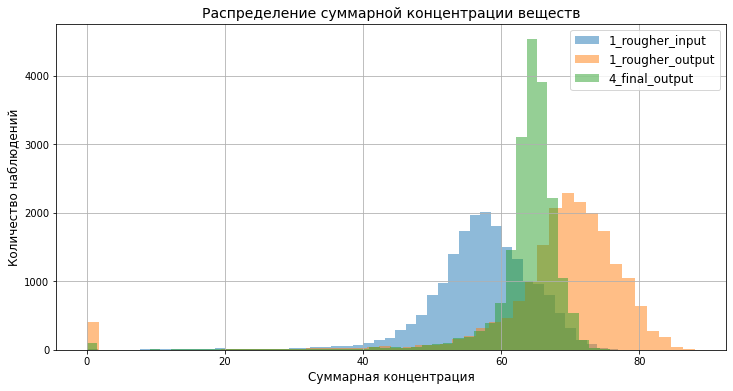

In [30]:
# Посчитаем суммарную концентрацию в исходном датасете
# и построим гистограммы для каждого из 3-х этапов

legend_list = []  # cписок этапов обогащения руды для легенды

for stage_type in ['1_rougher_input', '1_rougher_output', '4_final_output']:
    
    # Отбираем набор столбцов с параметрами для суммирования
    columns = (
        df_columns
        .query('stage_type == @stage_type')
        .query('parameter_name in @parameters_list')['full_parameter_name']                    
    )    
    
    # Сохраняем сумму в выбранных столбцах
    gold_full[stage_type + '_sum'] = gold_full[columns].sum(axis=1)
    
    # Рисуем гистограмму
    legend_list.append(stage_type)
    gold_full[stage_type + '_sum'].hist(alpha=0.5, bins=50,  figsize=(12, 6))     
      
plt.legend(legend_list, fontsize=12)
    
plt.title(label=f"Распределение суммарной концентрации веществ", fontsize=14)
plt.ylabel("Количество наблюдений", fontsize=12)
plt.xlabel("Суммарная концентрация", fontsize=12)  
plt.show()

In [31]:
for col in ['1_rougher_input_sum', '1_rougher_output_sum', '4_final_output_sum']:
    display(gold_full[col].describe())


count    19439.000000
mean        57.148832
std          7.712767
min          0.040000
25%         53.507961
50%         57.577384
75%         61.951075
max         76.978947
Name: 1_rougher_input_sum, dtype: float64

count    19439.000000
mean        68.144520
std         12.540021
min          0.000000
25%         66.003784
50%         70.177013
75%         74.356904
max         88.140119
Name: 1_rougher_output_sum, dtype: float64

count    19439.000000
mean        63.452988
std          7.171295
min          0.000000
25%         62.751608
50%         64.600093
75%         66.299542
max         75.802273
Name: 4_final_output_sum, dtype: float64

Вывод:
Теперь проверим, как изменятся значения, если удалим строки, когда 4_final_output_sum == 0

In [32]:
# удаляем нулевые суммарные значения
gold_full = gold_full[gold_full['4_final_output_sum'] != 0] 
gold_full = gold_full[gold_full['1_rougher_output_sum'] != 0]

In [33]:
# средняя сумарная концентрация металлов на разынх этапах после удаления нулевых значений
for col in ['1_rougher_input_sum', '1_rougher_output_sum', '4_final_output_sum']:
    display(gold_full[col].describe())

count    18949.000000
mean        57.158136
std          7.670555
min          0.040000
25%         53.482481
50%         57.586982
75%         61.961797
max         76.978947
Name: 1_rougher_input_sum, dtype: float64

count    18949.000000
mean        69.551035
std          7.860060
min          0.040000
25%         66.321377
50%         70.322267
75%         74.446687
max         88.140119
Name: 1_rougher_output_sum, dtype: float64

count    18949.000000
mean        63.767723
std          5.557634
min          0.030000
25%         62.768419
50%         64.595676
75%         66.303349
max         75.802273
Name: 4_final_output_sum, dtype: float64

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Ниже аналогичный фулл датасету процесс проверки 0 и удалении строк с нулевыми значениями

In [34]:

# проверим столбцы в тестовой выборке
df_columns = (
    gold_train.columns
    .rename("full_parameter_name")
    .to_frame()
    .reset_index(drop=True)
)

df_columns

,full_parameter_name
0,final.output.concentrate_ag
1,final.output.concentrate_pb
2,final.output.concentrate_sol
3,final.output.concentrate_au
4,final.output.recovery
5,final.output.tail_ag
6,final.output.tail_pb
7,final.output.tail_sol
8,final.output.tail_au
9,primary_cleaner.input.sulfate


In [35]:
# Разбиваем full_parameter_name
# на три новых столбца
df_columns = pd.concat(
    [
     df_columns,
     df_columns["full_parameter_name"]
     .str.split(".", expand=True)
     .rename(columns={0: "stage", 1: "parameter_type", 2: "parameter_name"}),
    ],
    axis=1,
)

df_columns


,full_parameter_name,stage,parameter_type,parameter_name
0,final.output.concentrate_ag,final,output,concentrate_ag
1,final.output.concentrate_pb,final,output,concentrate_pb
2,final.output.concentrate_sol,final,output,concentrate_sol
3,final.output.concentrate_au,final,output,concentrate_au
4,final.output.recovery,final,output,recovery
5,final.output.tail_ag,final,output,tail_ag
6,final.output.tail_pb,final,output,tail_pb
7,final.output.tail_sol,final,output,tail_sol
8,final.output.tail_au,final,output,tail_au
9,primary_cleaner.input.sulfate,primary_cleaner,input,sulfate


In [36]:
# Переименуем этапы с индексом порядка
df_columns.loc[
    df_columns["stage"] == "final", ["stage"]
] = "4_final"

df_columns.loc[
    df_columns["stage"] == "secondary_cleaner", ["stage"]
] = "3_secondary_cleaner"

df_columns.loc[
    df_columns["stage"] == "primary_cleaner", ["stage"]
] = "2_primary_cleaner"

df_columns.loc[
    df_columns["stage"] == "rougher", ["stage"]
] = "1_rougher"

# Для прозрачности добавим столбец этап + тип параметра
df_columns.loc[:, "stage_type"] = (df_columns["stage"]
                                   + "_"
                                   + df_columns["parameter_type"])
df_columns.stage.unique()


array(['4_final', '2_primary_cleaner', '1_rougher', '3_secondary_cleaner'],
      dtype=object)

In [37]:
# Ищем и сохраняем названия параметров
# с содержанием металлов
parameters_list = []

for metal in ['ag', 'pb', 'au', 'sol']:      
    parameters_list.append('feed_' + metal)
    parameters_list.append('concentrate_' + metal)    


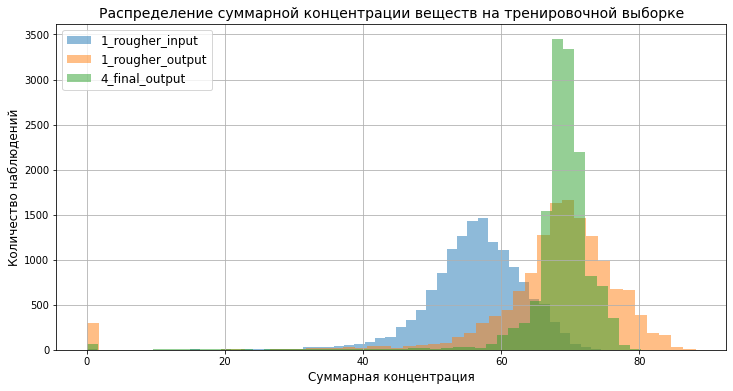

In [38]:

# Посчитаем суммарную концентрацию в тренировочном датасете
# и построим гистограммы для каждого из 3-х этапов

legend_list = []  # cписок этапов обогащения руды для легенды

for stage_type in ['1_rougher_input', '1_rougher_output', '4_final_output']:
    
    # Отбираем набор столбцов с параметрами для суммирования
    columns = (
        df_columns
        .query('stage_type == @stage_type')
        .query('parameter_name in @parameters_list')['full_parameter_name']                    
    )    
    
    # Сохраняем сумму в выбранных столбцах
    gold_train[stage_type + '_sum'] = gold_train[columns].sum(axis=1)
    
    # Рисуем гистограмму
    legend_list.append(stage_type)
    gold_train[stage_type + '_sum'].hist(alpha=0.5, bins=50,  figsize=(12, 6))     
      
plt.legend(legend_list, fontsize=12)
    
plt.title(label=f"Распределение суммарной концентрации веществ на тренировочной выборке", fontsize=14)
plt.ylabel("Количество наблюдений", fontsize=12)
plt.xlabel("Суммарная концентрация", fontsize=12)  
plt.show()

In [39]:
# удаляем нулевые суммарные значения из тренировочной выборки
gold_train = gold_train[gold_train['4_final_output_sum'] != 0] 
gold_train = gold_train[gold_train['1_rougher_output_sum'] != 0]
gold_train = gold_train[gold_train['1_rougher_input_sum'] != 0]

In [40]:
# средняя сумарная концентрация металлов на разынх этапах после удаления нулевых значений в ТРЕНИРОВОЧНОЙ выборке
for col in ['1_rougher_input_sum', '1_rougher_output_sum', '4_final_output_sum']:
    display(gold_train[col].describe())

count    13795.000000
mean        56.219933
std          6.989913
min          0.040000
25%         52.538724
50%         56.619236
75%         60.760588
max         74.458253
Name: 1_rougher_input_sum, dtype: float64

count    13795.000000
mean        68.610459
std          8.113216
min          0.040000
25%         65.248019
50%         69.310903
75%         73.508255
max         88.140119
Name: 1_rougher_output_sum, dtype: float64

count    13795.000000
mean        68.664585
std          5.432306
min          0.040000
25%         67.559772
50%         69.136193
75%         70.953745
max         80.210644
Name: 4_final_output_sum, dtype: float64

Не согласен с замечанием. Из `describe()` выше мы видим `min`, не равный нулю, а `min` равный 0.040000. Ниже также есть график

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

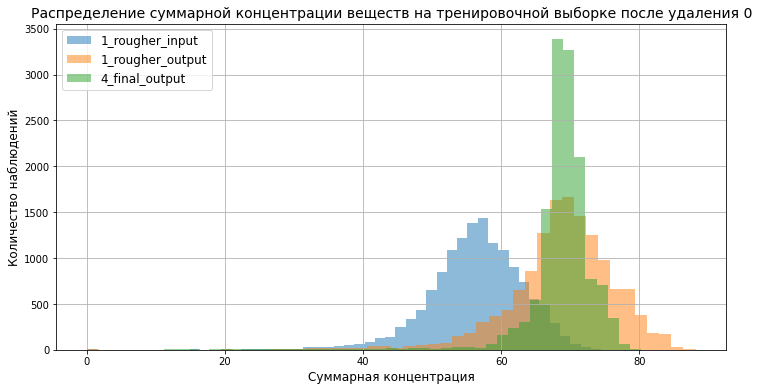

In [41]:

# Посчитаем суммарную концентрацию в тренировочном датасете
# и построим гистограммы для каждого из 3-х этапов

legend_list = []  # cписок этапов обогащения руды для легенды

for stage_type in ['1_rougher_input', '1_rougher_output', '4_final_output']:
    
    # Отбираем набор столбцов с параметрами для суммирования
    columns = (
        df_columns
        .query('stage_type == @stage_type')
        .query('parameter_name in @parameters_list')['full_parameter_name']                    
    )    
    
    # Сохраняем сумму в выбранных столбцах
    gold_train[stage_type + '_sum'] = gold_train[columns].sum(axis=1)
    
    # Рисуем гистограмму
    legend_list.append(stage_type)
    gold_train[stage_type + '_sum'].hist(alpha=0.5, bins=50,  figsize=(12, 6))     
      
plt.legend(legend_list, fontsize=12)
    
plt.title(label=f"Распределение суммарной концентрации веществ на тренировочной выборке после удаления 0", fontsize=14)
plt.ylabel("Количество наблюдений", fontsize=12)
plt.xlabel("Суммарная концентрация", fontsize=12)  
plt.show()

In [42]:
# Удалим столбцы, который не нужны для обучения
columns_to_drop = ['1_rougher_input_sum', '1_rougher_output_sum', '4_final_output_sum']

gold_train = gold_train.drop(columns_to_drop, axis=1)


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации⚠️:</b> 

Здесь заканчивается стрктурный блок работы - стоит сделать промежуточные выводы о проделанной работе в блоке.

## Модель

#### 3.1. Напишите функцию для вычисления итоговой sMAPE.

# $sMAPE= \frac{1}{N} \sum_{i=1}^{N} \frac {|y_i-\hat{y_i}|}{(|y_i|+|\hat{y_i}|)/2} \times 100\% $

$Final\hspace{0.2cm}sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)$

In [43]:
# определим цели и признаки
target = ['rougher.output.recovery', 'final.output.recovery']
features = list(set(gold_train.columns).intersection(set(gold_test.columns)).difference(set(target)))

In [44]:
# функция sMAPE
def sMAPE(y_true, y_pred):
    res = np.divide(np.abs(y_true - y_pred), (np.abs(y_true)+np.abs(y_pred))/2) *100
    return np.average(res, axis=0)

Добавил умножение на 100 в sMAPE

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [45]:
# функция итогового sMAPE
def Final_sMAPE(y_true,y_pred):
    smape_rougher = sMAPE(y_true[:, target.index('rougher.output.recovery')], y_pred[:, target.index('rougher.output.recovery')])
    smape_final = sMAPE(y_true[:, target.index('final.output.recovery')], y_pred[:, target.index('final.output.recovery')])
    return 0.25*smape_rougher + 0.75*smape_final

make_scorer() является функцией в библиотеке scikit-learn для создания пользовательских метрик оценки в задачах машинного обучения. Эта функция используется, когда вам нужно использовать метрику, которая не предоставляется стандартными метриками scikit-learn, или когда вы хотите настроить параметры существующей метрики.

In [46]:
# Кастомная метрика для оценки моделей
Final_sMAPE_score = make_scorer(Final_sMAPE, greater_is_better=False)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть функции для частного и взвешенного `sMAPE`, а также пользовательский скорринг для кросс-валидации - супер!
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [47]:
# удалил лишний раз обработку пропусков

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [48]:
# Формируем таргеты
X_train, X_test = gold_train[features].values, gold_test[features].values
y_train, y_test = gold_train[target].values, gold_test[target].values

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выделили признаки для обучения и целевые признаки - отлично!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 
Дополнительно можно было бы выполнить стандартизацию непрерывных переменных - это важно для линейной регрессии, которую ты используешь.

DummyRegressor - это классификатор, который используется в задачах регрессии для создания базовой модели, которую можно использовать для сравнения с более сложными моделями. Он просто предсказывает среднее значение целевой переменной из обучающего набора данных для каждого наблюдения в тестовом наборе данных.

Например, если в обучающем наборе данных среднее значение целевой переменной равно 5, то DummyRegressor будет предсказывать 5 для всех наблюдений в тестовом наборе данных. Это может быть полезно для оценки производительности более сложных моделей, так как это дает нам базовый уровень для сравнения.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 
Всё верно, только `DummyRegressor` - не классификатор, в отличие от `DummyClassifier`:)

In [49]:
# Проверим модель Дамми среднее - 
dm = DummyRegressor(strategy='mean').fit(X_train, y_train)
y_pred = dm.predict(X_test)
print('Среднее sMAPE:', Final_sMAPE(y_test, y_pred))

Среднее sMAPE: 9.82279305388574


ок, пересчитал функцию: теперь Final_sMAPE возвращает:
`smape_rougher = sMAPE(y_true[:, target.index('rougher.output.recovery')], y_pred[:, target.index('rougher.output.recovery')])
smape_final = sMAPE(y_true[:, target.index('final.output.recovery')], y_pred[:, target.index('final.output.recovery')])
return 0.25*smape_rougher + 0.75*smape_final`

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

удалил оценку константной модели в конце проекта

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть отценка константной модели - отлично!
</div>

In [56]:
# Проверим модель Линейной регресии
model_lr = LinearRegression().fit(X_train, y_train)
model_scores = cross_val_score(model_lr, X_train, y_train, cv=3, scoring = Final_sMAPE_score, n_jobs=-1, verbose=10)
print("Среднее sMAPE:", model_scores.mean()*-1)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END .............................. score: (test=-11.463) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .............................. score: (test=-10.755) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] END .............................. score: (test=-15.702) total time=   0.3s
Среднее sMAPE: 12.64042505482987


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Оценили линейную регрессию на кросс-валидации - отлично!

При работе с `cross_val_score`, а также с `GridSearchCV` или `RandomizedSearchCV` есть несколько полезных действий, которые сделают нашу жизнь проще и лучше:)
        
1. Можно настроить параметр `n_jobs=-1`, чтобы для вычислений использовались все доступные ядра - это ускорит процесс.
2. Можно настроить параметр `verbose=10`, чтобы инструмент взаимодействовал с логом и выдавал сообщения о прогрессе обучения - так мы будем понимать, что процесс идёт, а не что, например, у нас упало ядро, и процесс завис.
3. Для кросс-валидации (параметр `cv`) вполне можно использовать и 3 фолда: мы немного потеряем в качестве, но процесс будет происходить гораздо быстрее. Для учебного проекта более чем достаточно:)

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

GridSearchCV - это функция в библиотеке scikit-learn, предназначенная для оптимизации гиперпараметров модели машинного обучения с использованием перекрестной проверки (cross-validation). Она осуществляет поиск по сетке (grid) комбинаций гиперпараметров, чтобы найти наилучшую комбинацию для данной модели и набора данных.

Процесс работы GridSearchCV состоит из следующих этапов:

Определение модели машинного обучения и сетки гиперпараметров, по которой будет проводиться поиск.
Разделение набора данных на k блоков (k-fold cross-validation).
Обучение модели на k-1 блоках с использованием всех комбинаций гиперпараметров из сетки и оценка модели на оставшемся блоке.
Повторение процесса обучения и оценки для каждого из k блоков.
Вычисление средней оценки для каждой комбинации гиперпараметров и выбор комбинации с наилучшей оценкой.
Обучение модели на всем наборе данных с использованием наилучшей комбинации гиперпараметров.

RandomizedSearchCV выбирает случайный набор параметров из заданных распределений или списков параметров. Это уменьшает количество комбинаций, которые требуется проверить, и, как следствие, сокращает время вычислений.



In [57]:
# # Создание модели
# #- ОЧЕНЬ ДОЛГО ЖДАТЬ ОПТИМАЛЬНЫХ ПАРАМЕТРОВ - НУЖНО НЕСКОЛЬКО ЧАСОВ

# # Определение сетки параметров для GridSearchCV
# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'max_depth': [None] + [i for i in range(2, 11)],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # GridSearchCV
# rfr = RandomForestRegressor(random_state = 12345) 
# grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, verbose=10, 
#                            scoring = Final_sMAPE_score, n_jobs=-1, error_score='raise'
#                            )
# grid_search.fit(X_train, y_train)

# # Вывод оптимальных параметров
# print("Лучшие параметры: ", grid_search.best_params_)
# print("Лучшая оценка sMAPE: ", grid_search.best_score_)

Все равно GridSearchCV слишком долго работает в рамках обучающего проекта, поэтому будем использовать RandomizedSearchCV. Выше модифицировал код в соответствии с рекомендациями = очень долго.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено. Почему такие - при таких значениях мы меньше рискуем нарваться на переобучение.

ок, вставил такие значения параметра max_depth [None] + [i for i in range(2, 11)]
Вопрос - как из правильно подбиарать и почему так?

In [58]:

# Определение сетки параметров для RandomizedSearchCV - давайте их случайно подберем - так быстрее. около 5 мин)
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None] + [i for i in range(2, 11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Создание модели
rfr = RandomForestRegressor(random_state = 12345)

# RandomizedSearchCV - Значение n_iter в RandomizedSearchCV определяет количество случайных комбинаций параметров для проверки, вы можете увеличить или уменьшить
random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_dist, 
                                   n_iter=3, scoring = Final_sMAPE_score, cv=3,
                                   verbose=10, random_state = 12345, n_jobs=-1)
random_search.fit(X_train, y_train)

# Вывод оптимальных параметров
print("Лучшие параметры: ", random_search.best_params_)
print("Лучшая оценка sMAPE: ", random_search.best_score_ * -1)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/3; 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV 2/3; 1/3] START max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/3; 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV 3/3; 1/3] START max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/3; 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV 1/3; 2/3] START max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/3; 2/3] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total ti

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Для случайного леса оптимизировали гиперпараметры - отлично!

Добавлил вывод `best_score_` и `best_params_` во всех моделях. У RandomizedSearchCV задал random_state и у самой модели задал random_state

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

удалил кросс-валидацию после оптимизации и подбора гиперпараметров

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [59]:
# подберем параметры функцией GridSearchCV
params = {'min_samples_split': range(2, 10, 2), 'max_depth': range(4,8,2)}
                                                                   
# Создание модели
dtr = DecisionTreeRegressor(random_state = 12345)

g_cv = GridSearchCV(dtr, param_grid = params, scoring = Final_sMAPE_score, cv = 3, refit = True,
                     verbose=10, n_jobs=-1)

g_cv.fit(X_train, y_train)
best_params = g_cv.best_params_

# Вывод оптимальных параметров
print("Лучшие параметры: ", g_cv.best_params_)
print("Лучшая оценка sMAPE: ", g_cv.best_score_ * -1)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START max_depth=4, min_samples_split=2............................
[CV 1/3; 1/8] END ..........max_depth=4, min_samples_split=2; total time=   0.2s
[CV 2/3; 1/8] START max_depth=4, min_samples_split=2............................
[CV 2/3; 1/8] END ..........max_depth=4, min_samples_split=2; total time=   0.2s
[CV 3/3; 1/8] START max_depth=4, min_samples_split=2............................
[CV 3/3; 1/8] END ..........max_depth=4, min_samples_split=2; total time=   0.2s
[CV 1/3; 2/8] START max_depth=4, min_samples_split=4............................
[CV 1/3; 2/8] END ..........max_depth=4, min_samples_split=4; total time=   0.2s
[CV 2/3; 2/8] START max_depth=4, min_samples_split=4............................
[CV 2/3; 2/8] END ..........max_depth=4, min_samples_split=4; total time=   0.2s
[CV 3/3; 2/8] START max_depth=4, min_samples_split=4............................
[CV 3/3; 2/8] END ..........max_depth=4, min_samp

удалил дубликаты кода

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

#### Проверим на тестовых данных полученные модели

Да, тут ошибка вышла. Лучше всего себя показал случайный лес - самый низский sMAPE. Протестируем модель на тестовых данных

In [60]:
y_pred = random_search.predict(X_test)
print("Лучшие параметры: ", random_search.best_params_)
print('Среднее sMAPE:', Final_sMAPE(y_test, y_pred))

Лучшие параметры:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4}
Среднее sMAPE: 8.935439301292789


<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

 Сравнил модели Линейную Регрессию (Среднее sMAPE: 12.64), Случайный лес (Среднее sMAPE: 9.53), Дерево решений (Среднее sMAPE: 10.95) с DummyRegressor ( 9.82). По итогу, среднее sMAPE наименьшее у модели Случайный лес с целевой метрикой SMAPE 8.93 на тестовых данных; Лучшие параметры:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}


вывод обновил

поправил

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

#### Выводы

1. Загрузили данные - проверили на типы, проверили форматы, пропуски и подготовили к анализу
2. Построили графики распределений концентраций металлов в хвостах и концентрате после каждого технологического процесса:

* Флотация (rougher) - 20 золота, 12 серебра, 7 свинца идут в концентрат; 2 золота, 6 серебра, 1 свинца идут в хвосты
* Первичная очистка (primary_cleaner) - концентрация золота в концентрате растет: 35 золота, 10 серебра, 7 свинца; Заметно на этапе первичной очистки увеличилась концентрация серебра в хвостах;
*  Финал - концентрация золота уже 45 в концентрате
* P.S. На всех этапах, есть значение 0 в output концентрате (такие пики у нуля на нижнем ряду графиков). Возможно их нужно удалить - надо посоветоваться с заказчиком, откуда могли взяться нули

3. Средние размеры гранул сырья на обучающей и тестовой выборках похожи - 60 на обучающей и 55 на тестовой; отклонение 23 и 19
4. Написал функцию для оценки качества предсказаний моделей sMAPE
5.   Сравнил модели Линейную Регрессию (Среднее sMAPE: 12.64), Случайный лес (Среднее sMAPE: 9.53), Дерево решений (Среднее sMAPE: 10.95) с DummyRegressor ( 9.82). По итогу, среднее sMAPE наименьшее у модели Случайный лес с целевой метрикой SMAPE 8.93 на тестовых данных; Лучшие параметры:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}

6. Удалил 0 из данных тренировочных


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Есть итоговый вывод - отлично!

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.